# Effect of Oblate Sun on Planetary Orbits
## Summer Project

### Dhruv Aryan, Esha Sajjanhar
#### 25 September, 2022

#### Mentors: Prof. Bikram Phookun, Philip Cherian

In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.signal import find_peaks

#setting image sizes
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.facecolor']='w'

In [2]:
#setting values of neccesary constants

G = 6.67e-11           # in N m^2/kg^2
au = 1.49e11           # one astronomical unit in metres
dt = 1*60*60           # 1 hour in seconds
period = 88*24*60*60   #Mercury's period (88 days) in seconds
m = 3.3e23             #Mercury's mass in kg

## Defining necessary functions

In [3]:
#fn that outputs the analytical value of omega-kappa

def theory(p, j2, r_sun):
#inputs: circular approximation of distance from sun, J_2, radius of sun
    return (3/2*j2*((r_sun)**2)/p**2)



#fn that outputs the slope of a linear function using np.polyfit

def slope(p, q):
    array = np.polyfit(p, q, 1)
    return array[0]

In [4]:
#function which takes initial conditions and outputs the trajectory of the planet P around a star of variable oblateness
#inputs (in order): solar mass (M), oblateness (J2), radius of sun (r_sun) and initial distance from planet to sun (initial)

@njit     #using numba compiler
def orbit(M, J2, r_sun, initial):    
    
    #legendre polynomial
    def p2(x):
        return 0.5*((3*x**2)-1)

    #acceleration functions
    def a_x(x,y,r, J2):
        cos=x/r
        sin=y/r
        return (-G*M*x/r**3)*(1-(3*J2*(r_sun**2)*p2(cos)/(r**2))+(3*J2*(r_sun**2)*(sin**2)/r**2))
    def a_y(x,y,r, J2):
        cos=x/r
        sin=y/r
        return (-G*M*y/r**3)*(1-(3*J2*(r_sun**2)*p2(cos)/(r**2))-(3*J2*(r_sun**2)*(cos**2)/r**2))
    
    #defining the final time step for the numerical integrator
    tfinal= 200*period
    N = int(tfinal/dt)

    # Creating empty arrays
    T=np.zeros(N+1,np.float64)
    X=np.zeros(N+1,np.float64)
    Y=np.zeros(N+1,np.float64)
    V_x=np.zeros(N+1,np.float64)
    V_y=np.zeros(N+1,np.float64)
    R=np.zeros(N+1,np.float64)

    # Initial conditions: position and velocity

    X[0] = initial
    Y[0] = 0

    R[0]=np.sqrt(X[0]**2+Y[0]**2)

    V_x[0]=0
    V_y[0]= (2*np.pi*(X[0]))/(period)  #initial velocity calculated using a circular approximation for the orbit

    
    #velocity verlet integrator
    for i in range(1,N+1):
        T[i]=i*dt

        X[i] = X[i-1] + V_x[i-1]*dt + 0.5*a_x(X[i-1],Y[i-1],R[i-1], J2)*(dt**2)

        Y[i] = Y[i-1] + V_y[i-1]*dt + 0.5*a_y(X[i-1],Y[i-1],R[i-1], J2)*(dt**2)

        R[i]=np.sqrt(X[i]**2+Y[i]**2)

        V_x[i] = V_x[i-1] + 0.5*(a_x(X[i-1],Y[i-1],R[i-1], J2)+a_x(X[i],Y[i],R[i], J2))*dt

        V_y[i] = V_y[i-1] + 0.5*(a_y(X[i-1],Y[i-1],R[i-1], J2)+a_y(X[i],Y[i],R[i], J2))*dt

    return T, X, Y, R, V_x, V_y

## Assigning values to trajectory arrays for for different values of $J_2$

In [5]:
#defining the paramters of the model as per the mercury-sun system

mass = 2e30           #mass of sun
initial = 0.4*au      #initial distance of P from the sun

#defining the values of j2 for which the graphs are analysed
j0=0
j1=1
j2=2
j3=3
j4=4
j5=5
j6=700

In [6]:
#assigning the trajectory data (output of the orbit function) to variables for different values of j2

t00, x00, y00, r00, vx00, vy00 = orbit(mass, j0,6.9e8,initial)
t01, x01, y01, r01, vx01, vy01 = orbit(mass, j1,6.9e8,initial)
t02, x02, y02, r02, vx02, vy02 = orbit(mass, j2,6.9e8,initial)
t03, x03, y03, r03, vx03, vy03 = orbit(mass, j3,6.9e8,initial)
t04, x04, y04, r04, vx04, vy04 = orbit(mass, j4,6.9e8,initial)
t05, x05, y05, r05, vx05, vy05 = orbit(mass, j5,6.9e8,initial)
t06, x06, y06, r06, vx06, vy06 = orbit(mass, j6,6.9e8,initial)

In [7]:
#identifying the perihelion of each orbit as the minima of the array of position (r) for different values of j2
peaks00, _ = find_peaks(-r00)
peaks01, _ = find_peaks(-r01)
peaks02, _ = find_peaks(-r02)
peaks03, _ = find_peaks(-r03)
peaks04, _ = find_peaks(-r04)
peaks05, _ = find_peaks(-r05)
peaks06, _ = find_peaks(-r06)

In [15]:
#period as calculated using the width of the peaks in r for different values of j2

period_avg00 = np.mean(np.diff(t00[peaks00]))
period_avg01 = np.mean(np.diff(t01[peaks01]))
period_avg02 = np.mean(np.diff(t02[peaks02]))
period_avg03 = np.mean(np.diff(t03[peaks03]))
period_avg04 = np.mean(np.diff(t04[peaks04]))
period_avg05 = np.mean(np.diff(t05[peaks05]))
period_avg06 = np.mean(np.diff(t06[peaks06]))

In [16]:
#parameters of line of best fit of the graph of angular precession for different values of j2

m01,c01 = np.polyfit(t01[peaks01]/period_avg01, np.arctan2(x01[peaks01], y01[peaks01]), 1)
m02,c02 = np.polyfit(t02[peaks02]/period_avg02, np.arctan2(x02[peaks02], y02[peaks02]), 1)
m03,c03 = np.polyfit(t03[peaks03]/period_avg03, np.arctan2(x03[peaks03], y03[peaks03]), 1)
m04,c04 = np.polyfit(t04[peaks04]/period_avg04, np.arctan2(x04[peaks04], y04[peaks04]), 1)
m05,c05 = np.polyfit(t05[peaks05]/period_avg05, np.arctan2(x05[peaks05], y05[peaks05]), 1)
m06,c06 = np.polyfit(t06[peaks06]/period_avg06, np.arctan2(x06[peaks06], y06[peaks06]), 1)

## Plotting planetary orbits around spherical and oblate suns

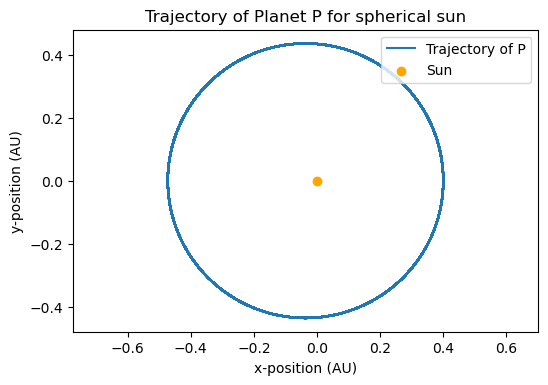

In [17]:
#planetary orbit observed for j2 = 0

plt.plot(x00/au,y00/au,label='Trajectory of P')
plt.scatter(0,0, color='orange',label='Sun')
plt.axis('equal')
plt.xlabel('x-position (AU)')
plt.ylabel('y-position (AU)')
plt.title('Trajectory of Planet P for spherical sun')
plt.legend(loc=1)
plt.savefig('orbit_0')
plt.show()

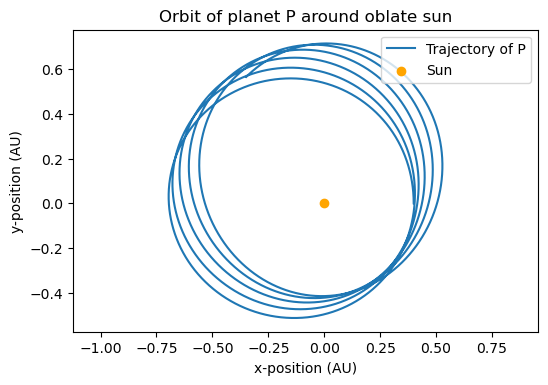

In [18]:
#orbit of planet P around star with j2 = 700

plt.plot(x06[0:20000]/au,y06[0:20000]/au,label='Trajectory of P')
plt.scatter(0,0, color='orange',label='Sun')
plt.axis('equal')
plt.xlabel('x-position (AU)')
plt.ylabel('y-position (AU)')
plt.title('Orbit of planet P around oblate sun')
plt.legend(loc=1)
plt.savefig('orbit_700')
plt.show()

## Identifying the perihelia of orbit for different values of $J_2$

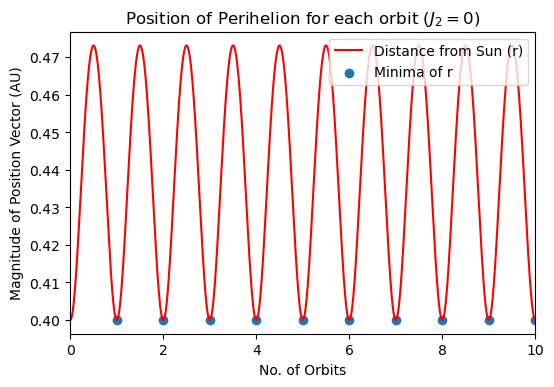

In [46]:
#plotting the minima of the array (r) on a graph of (r) versus time for j2 = 0

plt.plot(t00/period_avg00,r00/au,color='r',label='Distance from Sun (r)')
plt.scatter(t00[peaks00]/period_avg00,r00[peaks00]/au,label='Minima of r')
plt.xlabel('No. of Orbits')
plt.ylabel('Magnitude of Position Vector (AU)')
plt.title(r'Position of Perihelion for each orbit $(J_2 = 0)$')
plt.xlim(0, 10)
plt.legend(loc=1)
plt.savefig('r_vs_t_0')
plt.show()

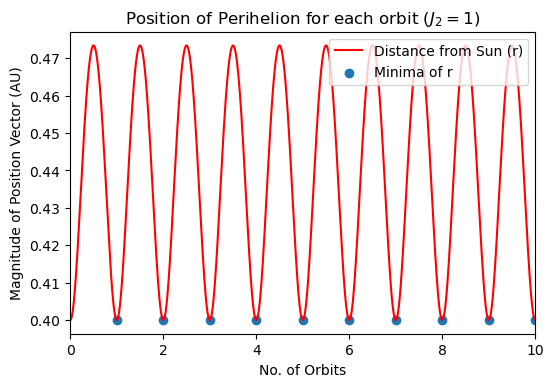

In [47]:
#plotting the minima of the array (r) on a graph of (r) versus time for j2 = 1

plt.plot(t01/period_avg01,r01/au,color='r',label='Distance from Sun (r)')
plt.scatter(t01[peaks01]/period_avg01,r01[peaks01]/au,label='Minima of r')
plt.xlabel('No. of Orbits')
plt.ylabel('Magnitude of Position Vector (AU)')
plt.title(r'Position of Perihelion for each orbit $(J_2 = 1$)')
plt.xlim(0, 10)
plt.legend(loc=1)
plt.savefig('r_vs_t_1')
plt.show()

## Plotting the angular precession for different values of $J_2$

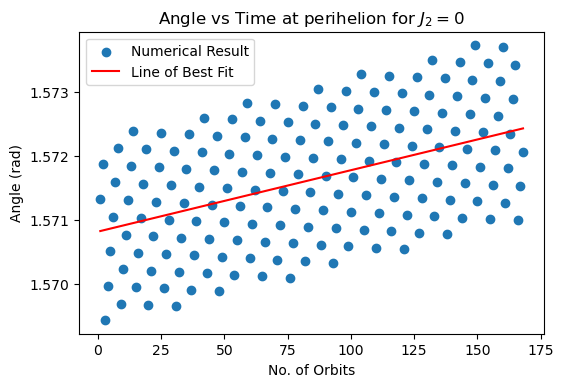

In [21]:
#plotting the angle at perihelion against time for j2 = 0

plt.scatter(t00[peaks00]/period_avg00, np.arctan2(x00[peaks00], y00[peaks00]), label = 'Numerical Result')
m00,c00=np.polyfit(t00[peaks00]/period_avg00, np.arctan2(x00[peaks00], y00[peaks00]), 1)
plt.plot(t00[peaks00]/period_avg00, [m00*a+c00 for a in (t00[peaks00]/period_avg00)],color='r', label = 'Line of Best Fit')
plt.xlabel('No. of Orbits')
plt.ylabel('Angle (rad)')
plt.title(r'Angle vs Time at perihelion for $J_2 = 0$')
plt.legend()
plt.savefig('angle_vs_t_0')
plt.show()

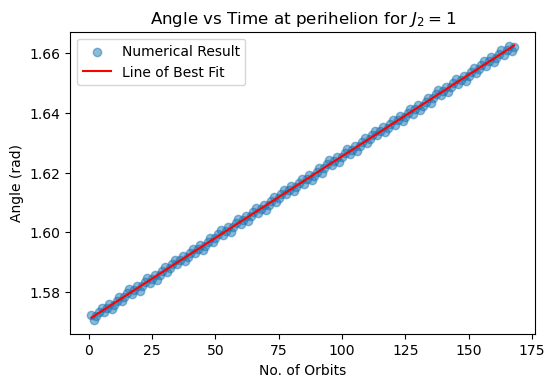

In [22]:
#plotting the angle at perihelion against time for j2 = 1

plt.scatter(t01[peaks01]/period_avg01, np.arctan2(x01[peaks01], y01[peaks01]), label = 'Numerical Result', alpha=0.5)
plt.plot(t01[peaks01]/period_avg01, [m01*a+c01 for a in (t01[peaks01]/period_avg01)],color='r', label = 'Line of Best Fit')
plt.xlabel('No. of Orbits')
plt.ylabel('Angle (rad)')
plt.title(r'Angle vs Time at perihelion for $J_2 = 1$')
plt.legend()
plt.savefig('angle_vs_t_1')
plt.show()

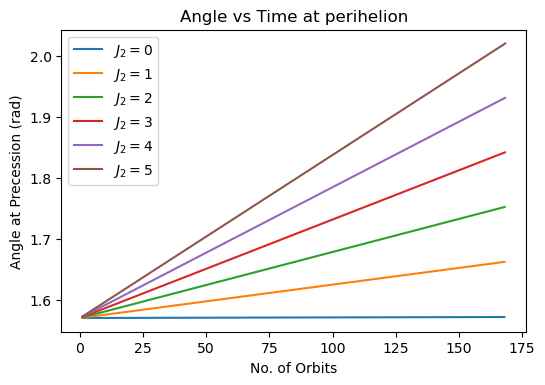

In [23]:
#plotting the angle at perihelion against time for several values of j2

plt.plot(t00[peaks00]/period_avg00, [m00*a+c00 for a in (t00[peaks00]/period_avg00)], label = r'$J_2=0$')
plt.plot(t01[peaks01]/period_avg00, [m01*a+c01 for a in (t01[peaks01]/period_avg01)], label = r'$J_2=1$')
plt.plot(t02[peaks02]/period_avg00, [m02*a+c02 for a in (t02[peaks02]/period_avg02)], label = r'$J_2=2$')
plt.plot(t03[peaks03]/period_avg00, [m03*a+c03 for a in (t03[peaks03]/period_avg03)], label = r'$J_2=3$')
plt.plot(t04[peaks04]/period_avg00, [m04*a+c04 for a in (t04[peaks04]/period_avg04)], label = r'$J_2=4$')
plt.plot(t05[peaks05]/period_avg00, [m05*a+c05 for a in (t05[peaks05]/period_avg05)], label = r'$J_2=5$')
plt.xlabel('No. of Orbits')
plt.ylabel('Angle at Precession (rad)')
plt.title(r'Angle vs Time at perihelion')
plt.legend()
plt.savefig('angle_manyj2')
plt.show()

# Evaluating Precession Rate

In [26]:
#the range of j2 values for which analytical and theoretical results are calculated
oblate1 = np.linspace(0, 5, 500)

#the range of R values for which analytical and theoretical results are calculated
r_sun = np.linspace(5e8,10e8,100)

#the range of r values for which analytical and theoretical results are calculated
radius = np.linspace(0.395*au,0.405*au,100)

In [27]:
#defining empty arrays for analytical result
ok_theory1= np.zeros(len(oblate1), np.float64)
ok_theory2= np.zeros(len(r_sun), np.float64)
ok_theory3= np.zeros(len(radius), np.float64)


#defining empty arrays for numerical result
slopes1 = np.zeros(len(oblate1), np.float64)
slopes2 = np.zeros(len(r_sun), np.float64)
slopes3 = np.zeros(len(radius), np.float64)

#defining empty arrays for average time period as calculated from width of peaks of (r)
period_avg1 = np.zeros(len(oblate1), np.float64)
period_avg2 = np.zeros(len(r_sun), np.float64)
period_avg3 = np.zeros(len(radius), np.float64)

## Rate of precession for various values of $J_2$

In [28]:
#evaluating the analytical and numerical values for rate of precession over a range of j2 values for fixed R, r

for i in range(0, len(oblate1)):
    t1, x1, y1, r1, vx1, vy1 = orbit(mass, oblate1[i],6.9e8,initial)                   #assigning arrays for time, position, velocity
    peaks1, _ = find_peaks(-r1)                                                        #minima of position array (r)
    period_avg1[i] = np.mean(np.diff(t1[peaks1]))                                      #period as calculated using the width of the peaks of r
    r_circ = np.cbrt(G*mass*(period_avg1[i]**2)/(4*np.pi**2))                          #approx circular distance as calculated using period_avg
    ok_theory1[i] = theory(r_circ, oblate1[i], 6.9e8)                                  #assigning analytical value to omega-kappa
    slopes1[i] = slope(t1[peaks1]/period_avg1[i], np.arctan2(x1[peaks1], y1[peaks1]))  #assigning numerical value to omega-kappa

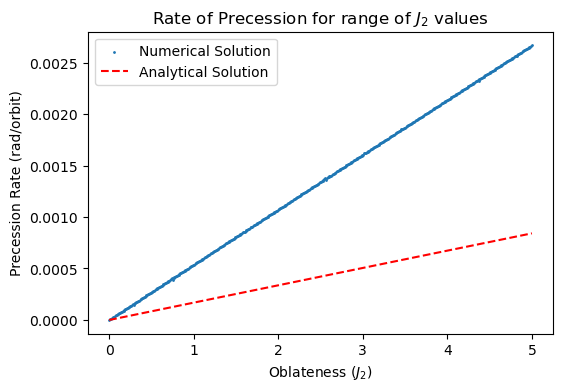

In [29]:
#plot of omega-kappa comparing analytical and numerical values
plt.scatter(oblate1, slopes1-m00, s=1, label='Numerical Solution')    #value of slope for j2 = 0 has been subtracted from this value
plt.plot(oblate1, ok_theory1, ls='--', color= 'r', label='Analytical Solution')
plt.xlabel(r'Oblateness $(J_2)$')
plt.ylabel('Precession Rate (rad/orbit)')
plt.title(r'Rate of Precession for range of $J_2$ values')
plt.legend()
plt.savefig('rate_vs_j2')
plt.show()

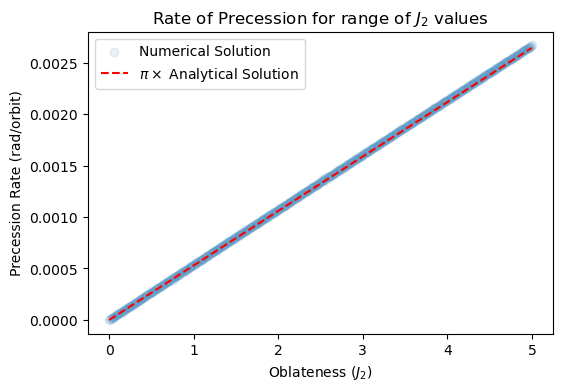

In [30]:
#plot of omega-kappa comparing analytical and numerical values
plt.scatter(oblate1, slopes1-m00, alpha=0.1, label='Numerical Solution')      #value of slope for j2 = 0 has been subtracted from this value
plt.plot(oblate1, np.pi*ok_theory1, ls='--', color= 'r', label=r'$\pi \times$ Analytical Solution')
plt.xlabel(r'Oblateness $(J_2)$')
plt.ylabel('Precession Rate (rad/orbit)')
plt.title(r'Rate of Precession for range of $J_2$ values')
plt.legend()
plt.savefig('rate_vs_j2_pi')
plt.show()

## Rate of precession for various values of $R$

In [31]:
#evaluating the analytical and numerical values for rate of precession over a range of R (radius of sun) values for fixed j2, r

for i in range(0, len(r_sun)):
    t2, x2, y2, r2, vx2, vy2 = orbit(mass, 1, r_sun[i],initial)                        #assigning arrays for time, position over range of j2 values
    peaks2, _ = find_peaks(-r2)                                                        #minima of position array (r)
    period_avg2[i] = np.mean(np.diff(t2[peaks2]))                                      #period as calculated using the width of the peaks in r
    r_circ = np.cbrt(G*mass*(period_avg2[i]**2)/(4*np.pi**2))                          #approx circular distance as calculated using period_avg
    ok_theory2[i] = theory(r_circ, 1, r_sun[i])                                        #assigning analytical value to omega-kappa
    slopes2[i] = slope(t2[peaks2]/period_avg2[i], np.arctan2(x2[peaks2], y2[peaks2]))  #assigning numerical value to omega-kappa

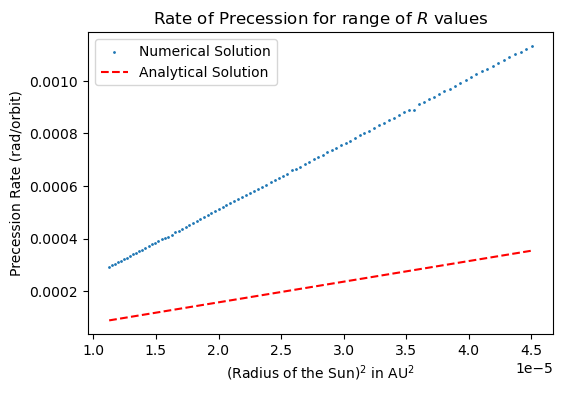

In [32]:
plt.scatter((r_sun/au)**2, slopes2, s=1, label='Numerical Solution')
plt.plot((r_sun/au)**2, ok_theory2, ls='--', color= 'r', label='Analytical Solution')
plt.xlabel(r'(Radius of the Sun)$^2$ in AU$^2$')
plt.ylabel('Precession Rate (rad/orbit)')
plt.title(r'Rate of Precession for range of $R$ values')
plt.legend()
plt.savefig('rate_vs_r_sun')
plt.show()

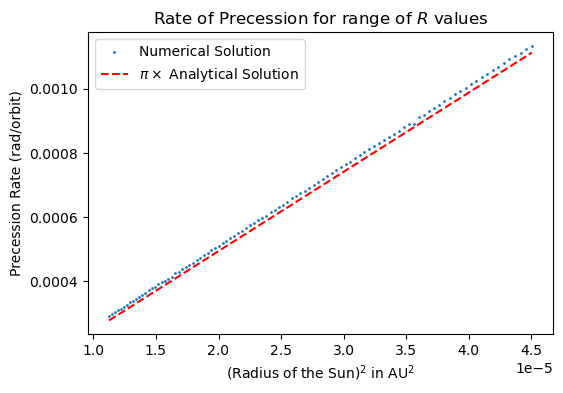

In [33]:
plt.scatter((r_sun/au)**2, slopes2, s=1, label='Numerical Solution')
plt.plot((r_sun/au)**2, np.pi*ok_theory2, ls='--', color= 'r', label=r'$\pi \times$ Analytical Solution')
plt.xlabel(r'(Radius of the Sun)$^2$ in AU$^2$')
plt.ylabel('Precession Rate (rad/orbit)')
plt.title(r'Rate of Precession for range of $R$ values')
plt.legend()
plt.savefig('rate_vs_r_sun_pi')
plt.show()

## Rate of precession for various values of $r$

In [34]:
#evaluating the analytical and numerical values for rate of precession over a range of r (dist from sun) values for fixed j2, R

for i in range(0, len(radius)):
    t3, x3, y3, r3, vx3, vy3 = orbit(mass, 1, 6.9e8, radius[i])                        #assigning arrays for time, position over range of j2 values
    peaks3, _ = find_peaks(-r3)                                                        #minima of position array (r)
    period_avg3[i] = np.mean(np.diff(t3[peaks3]))                                      #period as calculated using the width of the peaks in r
    r_circ = np.cbrt(G*mass*(period_avg3[i]**2)/(4*np.pi**2))                          #approx circular distance as calculated using period_avg
    ok_theory3[i] = theory(r_circ, 1, 6.9e8)                                           #assigning analytical value to omega-kappa
    slopes3[i] = slope(t3[peaks3]/period_avg3[i], np.arctan2(x3[peaks3], y3[peaks3]))  #assigning numerical value to omega-kappa

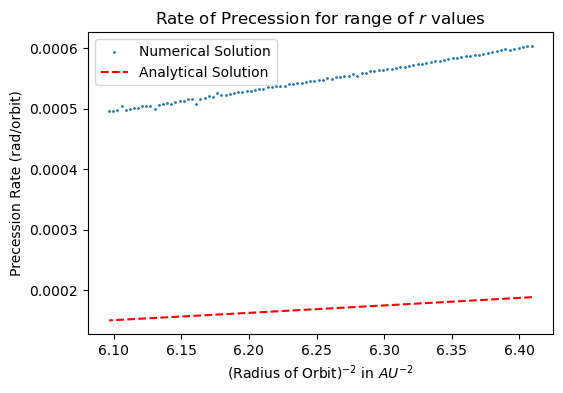

In [35]:
plt.scatter(1/(radius/au)**2, slopes3, s=1, label='Numerical Solution')
plt.plot(1/(radius/au)**2, ok_theory3, ls='--', color= 'r', label='Analytical Solution')
#plt.title('M = ' + str(mass) + ', t_avg (days) = ' + str((np.mean(period_avg3))/(24*60*60)))
plt.xlabel(r'(Radius of Orbit)$^{-2}$ in $AU^{-2}$')
plt.ylabel('Precession Rate (rad/orbit)')
plt.title(r'Rate of Precession for range of $r$ values')
plt.legend()
plt.savefig('rate_vs_r')
plt.show()

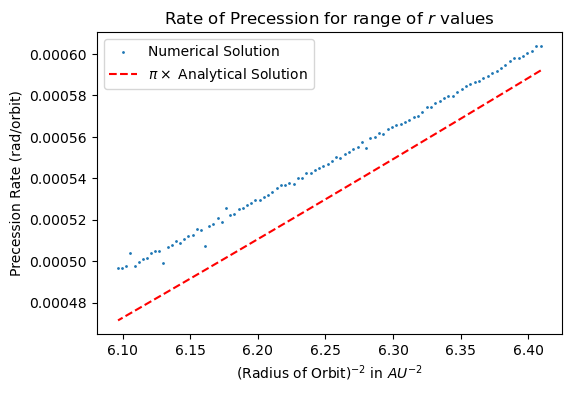

In [36]:
plt.scatter(1/(radius/au)**2, slopes3, s=1, label='Numerical Solution')
plt.plot(1/(radius/au)**2, np.pi*ok_theory3, ls='--', color= 'r', label=r'$\pi \times$ Analytical Solution')
#plt.title('M = ' + str(mass) + ', t_avg (days) = ' + str((np.mean(period_avg3))/(24*60*60)))
plt.xlabel(r'(Radius of Orbit)$^{-2}$ in $AU^{-2}$')
plt.ylabel('Precession Rate (rad/orbit)')
plt.title(r'Rate of Precession for range of $r$ values')
plt.legend()
plt.savefig('rate_vs_r_pi')
plt.show()

# Testing Computational Accuracy

In [37]:
#fn which outputs the value of total angular momentum, total energy in the system as an array for each time index using trajectory arrays

@njit
def conservation(M, J2, r_sun, initial):
#inputs: mass of sun (M), oblateness of sun (J2), radius of sun (r_sun) and initial distance from sun (initial)

    t, x, y, r, vx, vy = orbit(M, J2, r_sun, initial)    #calling the trajectory arrays
    
    N = len(t)                                           #defining length of integration
    
    
    #defining empty arrays for angular momentum and time
    L_mag=np.zeros(N,np.float64)
    e=np.zeros(N,np.float64)
    
    #defining the elements of the angular momentum (initial values)
    rad0=np.array([x[0],y[0],0])                        #position vector
    v0=np.array([vx[0],vy[0],0])                        #velocity vector
    p0=m*v0                                             #momentum vector
    L0=np.cross(rad0,p0)                                #angular momentum vector
    L_mag[0]=np.linalg.norm(L0)                         #magnitude of angular momentum
    
    
    #defining elements of total energy (initial values)
    u0 = (-G*M*m)/r[0]                                  #potential energy
    k0 = 0.5*m*(vx[0]**2+vy[0]**2)                      #kinetic energy
    e[0]=u0+k0                                          #total energy
    
    
    #evaluating the value of total energy at each time step
    for i in range(1,N):
        rad=np.array([x[i],y[i],0])                     #position vector
        v=np.array([vx[i],vy[i],0])                     #velocity vector
        p=m*v                                           #momentum vector
        L=np.cross(rad,p)                               #angular momentum vector
        L_mag[i]=np.linalg.norm(L)                      #magnitude of angular momentum
        
        u = (-G*M*m)/r[i]                               #potential energy
        k = 0.5*m*(np.linalg.norm(v))**2                #kinetic energy
        e[i]=u+k                                        #total energy
        
    return L_mag, e

In [38]:
#assigning the angular momentum and energy to variables for different values of j2

l0, e0 = conservation(mass, j0, 6.9e8, initial)
l5, e5 = conservation(mass, j5, 6.9e8, initial)

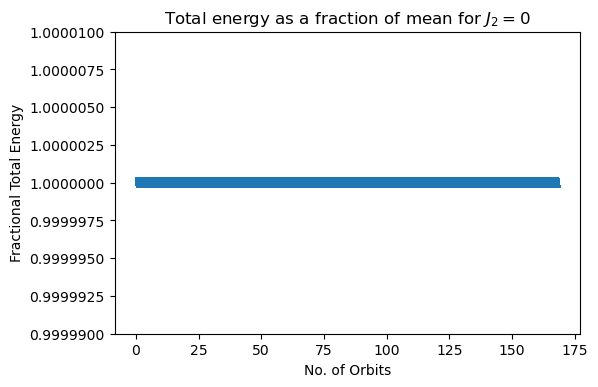

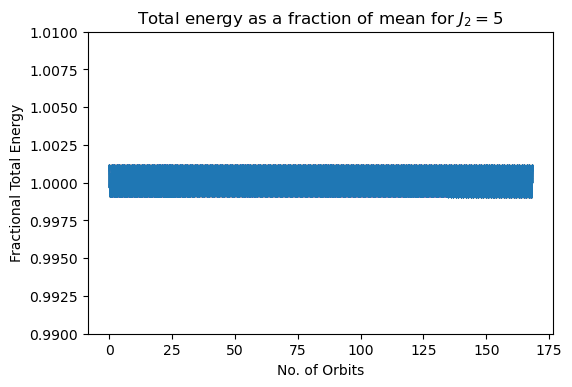

In [43]:
#plotting the magnitude of total energy as a fraction of its mean value against time for j2 = 0, 5

plt.scatter(t00/period_avg00, e0/np.mean(e0), s=1)
plt.gca().ticklabel_format(useOffset=False)
plt.ylim(0.99999,1.00001)
plt.xlabel('No. of Orbits')
plt.ylabel('Fractional Total Energy')
plt.title(r'Total energy as a fraction of mean for $J_2 = 0$')
plt.savefig('energy_0')
plt.show()

plt.scatter(t05/period_avg05, e5/np.mean(e5), s=0.01)
plt.gca().ticklabel_format(useOffset=False)
plt.ylim(0.99,1.01)
plt.xlabel('No. of Orbits')
plt.ylabel('Fractional Total Energy')
plt.title(r'Total energy as a fraction of mean for $J_2 = 5$')
plt.savefig('energy_5')
plt.show()

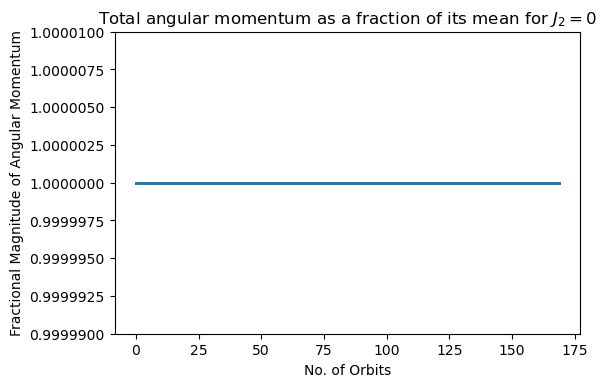

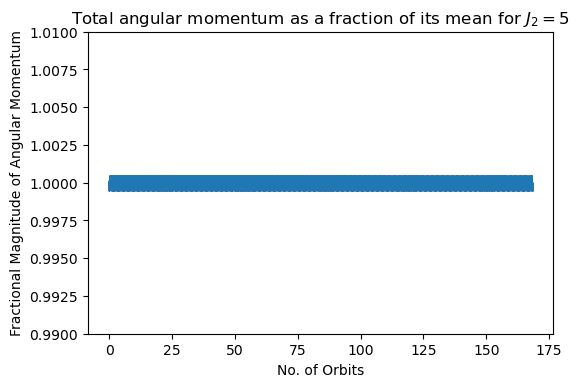

In [44]:
#plotting the magnitude of total angular momentum as a fraction of its mean value against time for j2 = 0, 5

plt.scatter(t00/period_avg00, l0/np.mean(l0),s=1)
plt.gca().ticklabel_format(useOffset=False)
plt.xlabel('No. of Orbits')
plt.ylabel('Fractional Magnitude of Angular Momentum')
plt.title(r'Total angular momentum as a fraction of its mean for $J_2 = 0$')
plt.ylim(0.99999,1.00001)
plt.savefig('momentum_0')
plt.show()

plt.scatter(t05/period_avg05, l5/np.mean(l5), s=0.01)
plt.gca().ticklabel_format(useOffset=False)
plt.ylim(0.99,1.01)
plt.xlabel('No. of Orbits')
plt.ylabel('Fractional Magnitude of Angular Momentum')
plt.title(r'Total angular momentum as a fraction of its mean for $J_2 = 5$')
plt.savefig('momentum_5')
plt.show()

In [45]:
#evaluating the standard deviation of the value of total angular momentum and total energy in the system

print('Standard deviation of total angular momentum for J2 = 0 is  ', np.std(l0/np.mean(l0)))
print('Standard deviation of total energy for J2 = 0 is  ', np.std(e0/np.mean(e0)))
print('Standard deviation of total angular momentum for J2 = 5 is  ', np.std(l5/np.mean(l5)))
print('Standard deviation of total energy for J2 = 5 is  ', np.std(e5/np.mean(e5)))

Standard deviation of total angular momentum for J2 = 0 is   1.3000600300316307e-14
Standard deviation of total energy for J2 = 0 is   1.9205918421994051e-07
Standard deviation of total angular momentum for J2 = 5 is   0.00030021720029855257
Standard deviation of total energy for J2 = 5 is   0.0006171036327580389
